In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/home/aman/Documents/Project/DepthCal/Code/Data/data/"

left = path + "left/"
right = path + "right/"

In [3]:
def orb(list_kpL, list_kpR):
    orb = cv2.ORB_create()

    kpL, desL = orb.detectAndCompute(imgL, None)
    kpR, desR = orb.detectAndCompute(imgR, None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
    matches = bf.match(desL, desR)
    matches = sorted(matches, key = lambda x:x.distance)
    #matching_result = cv2.drawMatches(imgL, kpL, imgR, kpR, matches[:20], None)

    for mat in matches:
        imgL_idx = mat.queryIdx
        imgR_idx = mat.trainIdx
        (xL,yL) = kpL[imgL_idx].pt
        (xR,yR) = kpR[imgR_idx].pt
        list_kpL.append((xL, yL))
        list_kpR.append((xR, yR))

In [4]:
def disparity():
    
    list_kpL = []
    list_kpR = []
    dis = 0
    
    orb(list_kpL, list_kpR)
    
    for j in range(20):
        dis+=abs(list_kpL[j][0] - list_kpR[j][0])
        
    dis = dis/20
        
    disp.append(dis)

In [5]:
disp = []
for i in range(1, 8):
    
    image = str(i) + ".jpg"
    
    imgL = cv2.imread(left + image, 0)
    imgR = cv2.imread(right + image, 0)
    
    imgL = cv2.resize(imgL, (720, 480))
    imgR = cv2.resize(imgR, (720, 480))
    
    disparity()

In [6]:
disp

[80.04899978637695,
 90.5680763244629,
 72.71836013793946,
 14.865396881103516,
 4.687014770507813,
 12.949972534179688,
 34.15634613037109]

In [7]:
aD = [2, 1, 1.5, 2.5, 3, 5, 4]

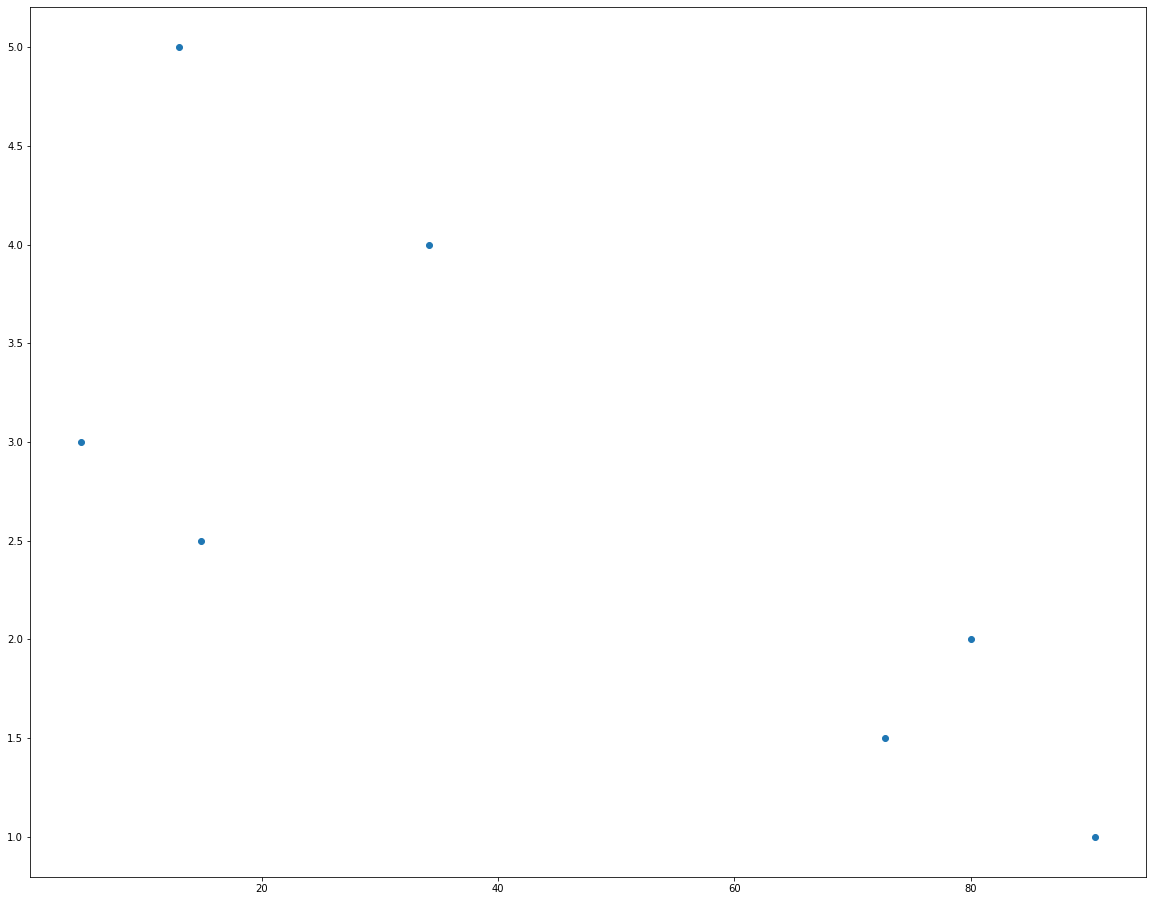

In [8]:
plt.figure(figsize = (20, 16))
plt.scatter(disp, aD)
plt.show()

In [ ]:
'''cv2.circle(imgL, (xL, yL), 2, (255, 255, 0), 10)
cv2.circle(imgR, (xR, yR), 2, (255, 255, 0), 10)

cv2.imshow("Left", imgL)
cv2.imshow("Right", imgR)

cv2.imshow("Matching Result", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()'''